In [4]:
import theano

In [5]:
print('theano: %s' % theano.__version__)

theano: 1.0.3


In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def getHouston311Data(year):
    #Check file
    if not os.path.isfile('311-Public-Data-Extract-' + year + '-clean.txt'):
        print ("Downloading file") 
        os.system("curl -O http://hfdapp.houstontx.gov/311/311-Public-Data-Extract-" + year + \
                      "-clean.txt ")

    # Check:
    if not os.path.isfile('311-Public-Data-Extract-' + year + '-clean.txt'):
        print ("WARNING!!! Something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue")

#Set date and download

In [8]:
getHouston311Data('2014')
getHouston311Data('2015')
getHouston311Data('2016')
getHouston311Data('2017')
getHouston311Data('2018')
getHouston311Data('Harvey')

File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue


### The link for the below dataset is "https://drive.google.com/open?id=16LpmQZ-6tx_lxFafuK6VOE7ZkA5XYEx8"

In [9]:
harvey_2014 = pd.read_csv('311-Public-Data-Extract-2014-clean.txt',delimiter='|',infer_datetime_format=True,
                          error_bad_lines=False)#,parse_dates=)
harvey_2015 = pd.read_csv('311-Public-Data-Extract-2015-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)#,parse_dates=)
harvey_2016 = pd.read_csv('311-Public-Data-Extract-2016-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)
harvey = pd.read_csv('311-Public-Data-Extract-Harvey-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)

b'Skipping line 99734: expected 29 fields, saw 30\n'
b'Skipping line 142004: expected 29 fields, saw 30\nSkipping line 142593: expected 29 fields, saw 30\nSkipping line 153307: expected 29 fields, saw 30\n'
b'Skipping line 191133: expected 29 fields, saw 30\nSkipping line 193661: expected 29 fields, saw 30\n'
b'Skipping line 207621: expected 29 fields, saw 30\nSkipping line 219587: expected 29 fields, saw 30\nSkipping line 225099: expected 29 fields, saw 30\n'
b'Skipping line 277030: expected 29 fields, saw 30\n'
b'Skipping line 78774: expected 29 fields, saw 31\n'
b'Skipping line 105843: expected 29 fields, saw 30\n'
b'Skipping line 134103: expected 29 fields, saw 30\n'
b'Skipping line 168990: expected 29 fields, saw 30\n'
b'Skipping line 198468: expected 29 fields, saw 30\nSkipping line 220140: expected 29 fields, saw 30\n'
b'Skipping line 272891: expected 29 fields, saw 30\nSkipping line 282449: expected 29 fields, saw 30\n'
b'Skipping line 339858: expected 29 fields, saw 31\nSkippi

## Compiled for 2014,2015,2016

In [10]:
# Concating the years
harvey_compiled = pd.concat([harvey_2014,harvey_2015,harvey_2016]) 

In [11]:
harvey_compiled.head()

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,SR CREATE DATE,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01 00:13:34,2014-09-10 08:30:00,2014-02-28 13:00:18,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01 00:21:16,2014-01-04 00:21:16,2014-01-01 05:59:44,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01 00:23:46,2014-01-08 00:23:46,2014-01-03 16:44:47,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:36:52,2014-01-08 00:36:52,2014-01-03 16:49:37,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:37:31,2014-01-23 12:40:00,2014-01-09 12:42:18,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [12]:
harvey_compiled.rename({'CASE NUMBER':'Case_Number',
       'SR LOCATION':'Request_Location','COUNTY':'County', 'DISTRICT':'District',
       'NEIGHBORHOOD':'Neighborhood', 'TAX ID':'Tax_id',
       'TRASH QUAD':'Trash_Quad', 'RECYCLE QUAD':'Recycle_Quad', 'TRASH DAY':'Trash_Day',
       'HEAVY TRASH DAY':'Heavy_Trash_Day', 'RECYCLE DAY':'Recycle_Day', 'KEY MAP':'Key_Map',
       'MANAGEMENT DISTRICT':'Management_District','DEPARTMENT':'Department',
       'DIVISION':'Division', 'SR TYPE':'SR_Type','QUEUE':'Queue', 
        'SLA':'Service_Level_Agreement_Days','STATUS':'Status', 
               'SR CREATE DATE':'Service_Request_Creation_Date', 'DUE DATE':'Due_Date',
       'DATE CLOSED':'Date_Closed', 'OVERDUE':'Overdue',
       'Title':'Request_Title',
       'x':'X_Coords_ESRI', 'y':'Y_Coords_ESRI', 'LATITUDE':'Latitude',
       'LONGITUDE':'Longitude', 'Channel Type':'Channel_Type', 'Unnamed: 29':'Unnamed_29','month':'Month'},axis=1,inplace=True)

In [13]:
harvey_compiled.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01 00:13:34,2014-09-10 08:30:00,2014-02-28 13:00:18,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01 00:21:16,2014-01-04 00:21:16,2014-01-01 05:59:44,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01 00:23:46,2014-01-08 00:23:46,2014-01-03 16:44:47,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:36:52,2014-01-08 00:36:52,2014-01-03 16:49:37,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:37:31,2014-01-23 12:40:00,2014-01-09 12:42:18,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [14]:
harvey_compiled.Service_Request_Creation_Date = \
                    pd.to_datetime(harvey_compiled.Service_Request_Creation_Date, errors= 'coerce')
harvey_compiled.Date_Closed = \
                    pd.to_datetime(harvey_compiled.Date_Closed, errors= 'coerce')
harvey_compiled.Due_Date = \
                    pd.to_datetime(harvey_compiled.Due_Date, errors= 'coerce')

In [15]:
harvey_compiled['Service_Request_Creation_Date'] = harvey_compiled.Service_Request_Creation_Date.dt.date
harvey_compiled.Date_Closed = harvey_compiled.Date_Closed.dt.date
harvey_compiled.Due_Date = harvey_compiled.Due_Date.dt.date

In [16]:
harvey_compiled_sub = harvey_compiled[['Case_Number','SR_Type','Service_Level_Agreement_Days'\
                                       ,'Service_Request_Creation_Date','Due_Date','Date_Closed','Overdue']]

In [17]:
harvey_compiled_sub.loc[:,'Service_Level_Agreement_Days'] = pd.to_numeric(harvey_compiled_sub.Service_Level_Agreement_Days,errors='coerce')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
len(harvey_compiled)

1026842

In [19]:
harvey_compiled.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01,2014-09-10,2014-02-28,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01,2014-01-04,2014-01-01,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01,2014-01-08,2014-01-03,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01,2014-01-08,2014-01-03,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01,2014-01-23,2014-01-09,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [20]:
top_20 = ['Storm Debris Collection',
       'Missed Garbage Pickup',
       'Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak',
       'Flooding',
       'Sewer Wastewater',
       'Street Hazard',
       'Nuisance On Property',
       'Drainage',
       'Water Service',
       'Traffic Signs',
       'Crisis Cleanup',
       'Unclassified 311 Web Request',
       'Recycling Cart Repair or Replace',
       'Parking Violation',
       'Traffic Signals',
       'Dead Animal Collection',
       'SWM Escalation',
       'New Resident Container']

In [21]:
# Top 20 SR_Type requests by number of requests
# harvey_compiled[['Case_Number', 'SR_Type']].groupby('SR_Type').count().sort_values('Case_Number', ascending=False).head(20).reset_index()

In [22]:
# harvey_compiled.groupby(['just_date', 'SR_Type']).count().reset_index()

In [23]:
harvey_compiled.loc[harvey_compiled['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean()

,Overdue
SR_Type,
Container Problem,-4.126120
Crisis Cleanup,157.638228
Dead Animal Collection,-1.518507
Drainage,-26.545170
Flooding,1.645342
Missed Garbage Pickup,-2.339167
New Resident Container,-2.242109
Nuisance On Property,-108.626029
Parking Violation,-10.405596


## Harvey time

In [24]:
harvey.head()

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,SR CREATE DATE,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type
0,12161731-101002716483,"5303 PALMETTO, HOUSTON TX 77081",HARRIS,J,GULFTON,1203000010001,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:06:56,2017-08-25 00:06:55,2017-08-23 00:30:19,-1.98,Water Service-101002716483,3.087909e+06,1.382325e+07,29.71184581,-95.47298327,Voice In
1,101002716484,"8131 LOYAL, HOUSTON TX 77016",HARRIS,B,EAST LITTLE YORK / HOMESTEAD,1276500020029,NE,NW,TUESDAY,2nd Monday,...,2017-08-23 00:37:34,2017-08-29 08:00:00,2017-08-23 11:12:52,-5.87,Missed Garbage Collection-101002716484,3.147801e+06,1.388005e+07,29.86285934,-95.27870914,Voice In
2,12161732-101002716485,Intersection 5200 DUNLAVY ST&1700 SOUTH BLVD,Harris County,C,UNIVERSITY PLACE,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:44:19,2017-09-02 00:44:19,2017-08-25 06:10:15,-7.77,Water Leak-101002716485,3.110241e+06,1.382932e+07,29.72665013,-95.40207675,Voice In
3,12161733-101002716486,"5419 GULFTON, HOUSTON TX 77081",HARRIS,J,GULFTON,0762180000004,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:50:09,2017-08-25 00:50:09,2017-08-23 01:00:14,-1.99,Water Service-101002716486,3.087136e+06,1.382474e+07,29.71599619,-95.47527561,Voice In
4,101002716487,Intersection 5000 KIRKPATRICK BLVD&0 N LOOP FWY E,Harris County,B,TRINITY / HOUSTON GARDENS,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:53:01,2017-08-27 00:53:01,2017-08-23 17:00:14,-3.33,Remove Dead Animal from City Street or Curb-10...,3.144472e+06,1.385882e+07,29.8048057,-95.29132843,Voice In


In [25]:
harvey.rename({'CASE NUMBER':'Case_Number',
       'SR LOCATION':'Request_Location','COUNTY':'County', 'DISTRICT':'District',
       'NEIGHBORHOOD':'Neighborhood', 'TAX ID':'Tax_id',
       'TRASH QUAD':'Trash_Quad', 'RECYCLE QUAD':'Recycle_Quad', 'TRASH DAY':'Trash_Day',
       'HEAVY TRASH DAY':'Heavy_Trash_Day', 'RECYCLE DAY':'Recycle_Day', 'KEY MAP':'Key_Map',
       'MANAGEMENT DISTRICT':'Management_District','DEPARTMENT':'Department',
       'DIVISION':'Division', 'SR TYPE':'SR_Type','QUEUE':'Queue', 
        'SLA':'Service_Level_Agreement_Days','STATUS':'Status', 
               'SR CREATE DATE':'Service_Request_Creation_Date', 'DUE DATE':'Due_Date',
       'DATE CLOSED':'Date_Closed', 'OVERDUE':'Overdue',
       'Title':'Request_Title',
       'x':'X_Coords_ESRI', 'y':'Y_Coords_ESRI', 'LATITUDE':'Latitude',
       'LONGITUDE':'Longitude', 'Channel Type':'Channel_Type', 'Unnamed: 29':'Unnamed_29','month':'Month'},axis=1,inplace=True)

In [26]:
harvey.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,12161731-101002716483,"5303 PALMETTO, HOUSTON TX 77081",HARRIS,J,GULFTON,1203000010001,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:06:56,2017-08-25 00:06:55,2017-08-23 00:30:19,-1.98,Water Service-101002716483,3.087909e+06,1.382325e+07,29.71184581,-95.47298327,Voice In
1,101002716484,"8131 LOYAL, HOUSTON TX 77016",HARRIS,B,EAST LITTLE YORK / HOMESTEAD,1276500020029,NE,NW,TUESDAY,2nd Monday,...,2017-08-23 00:37:34,2017-08-29 08:00:00,2017-08-23 11:12:52,-5.87,Missed Garbage Collection-101002716484,3.147801e+06,1.388005e+07,29.86285934,-95.27870914,Voice In
2,12161732-101002716485,Intersection 5200 DUNLAVY ST&1700 SOUTH BLVD,Harris County,C,UNIVERSITY PLACE,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:44:19,2017-09-02 00:44:19,2017-08-25 06:10:15,-7.77,Water Leak-101002716485,3.110241e+06,1.382932e+07,29.72665013,-95.40207675,Voice In
3,12161733-101002716486,"5419 GULFTON, HOUSTON TX 77081",HARRIS,J,GULFTON,0762180000004,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:50:09,2017-08-25 00:50:09,2017-08-23 01:00:14,-1.99,Water Service-101002716486,3.087136e+06,1.382474e+07,29.71599619,-95.47527561,Voice In
4,101002716487,Intersection 5000 KIRKPATRICK BLVD&0 N LOOP FWY E,Harris County,B,TRINITY / HOUSTON GARDENS,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:53:01,2017-08-27 00:53:01,2017-08-23 17:00:14,-3.33,Remove Dead Animal from City Street or Curb-10...,3.144472e+06,1.385882e+07,29.8048057,-95.29132843,Voice In


In [27]:
harvey.Service_Request_Creation_Date = \
                    pd.to_datetime(harvey.Service_Request_Creation_Date, errors= 'coerce')
harvey.Date_Closed = \
                    pd.to_datetime(harvey.Date_Closed, errors= 'coerce')
harvey.Due_Date = \
                    pd.to_datetime(harvey.Due_Date, errors= 'coerce')

In [28]:
harvey['Service_Request_Creation_Date'] = harvey.Service_Request_Creation_Date.dt.date
harvey.Date_Closed = harvey.Date_Closed.dt.date
harvey.Due_Date = harvey.Due_Date.dt.date

In [29]:
harvey_sub = harvey[['Case_Number','SR_Type','Service_Level_Agreement_Days'\
                                       ,'Service_Request_Creation_Date','Due_Date','Date_Closed','Overdue']]

In [30]:
harvey_sub.loc[:,'Service_Level_Agreement_Days'] = pd.to_numeric(harvey_sub.Service_Level_Agreement_Days,errors='coerce')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
harvey_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue
0,12161731-101002716483,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.98
1,101002716484,Missed Garbage Pickup,4.0,2017-08-23,2017-08-29,2017-08-23,-5.87
2,12161732-101002716485,Water Leak,10.0,2017-08-23,2017-09-02,2017-08-25,-7.77
3,12161733-101002716486,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.99
4,101002716487,Dead Animal Collection,4.0,2017-08-23,2017-08-27,2017-08-23,-3.33


In [32]:
# Top 20 SR_Type requests by number of requests
# harvey_compiled[['Case_Number', 'SR_Type']].groupby('SR_Type').count().sort_values('Case_Number', ascending=False).head(20).reset_index()

In [33]:
# harvey_compiled.groupby(['just_date', 'SR_Type']).count().reset_index()

In [34]:
harvey.loc[harvey['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean(),harvey_compiled.loc[harvey_compiled['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean()

(                                     Overdue
 SR_Type                                     
 Container Problem                  28.679741
 Crisis Cleanup                      3.533351
 Dead Animal Collection             -2.557025
 Drainage                          -16.739698
 Flooding                            1.159793
 Missed Garbage Pickup              -0.970756
 New Resident Container              9.482291
 Nuisance On Property             -196.128863
 Parking Violation                 -13.649832
 Recycling Cart Repair or Replace   35.422341
 SWM Escalation                     13.033351
 Sewer Wastewater                    3.145179
 Storm Debris Collection            19.439114
 Street Hazard                      -4.790116
 Traffic Signal Maintenance         -0.385849
 Traffic Signals                   -11.366099
 Traffic Signs                      -4.105809
 Unclassified 311 Web Request       -1.172730
 Water Leak                         -6.120340
 Water Service                    

In [35]:
# post Harvey
harvey.loc[harvey['SR_Type']\
                .isin(['Storm Debris Collection',
       'Missed Garbage Pickup','Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak','Flooding'])][['SR_Type','Overdue']].groupby('SR_Type').describe()

Overdue                                       \
                              count       mean        std    min     25%   
SR_Type                                                                    
Container Problem            5630.0  28.679741  59.395766 -10.00  2.8325   
Flooding                     4397.0   1.159793   5.343616  -4.00 -1.9600   
Missed Garbage Pickup        5844.0  -0.970756   4.671939  -9.04 -4.8100   
Storm Debris Collection     10207.0  19.439114  35.744806  -5.00 -4.7500   
Traffic Signal Maintenance   4907.0  -0.385849   1.504501  -1.00 -0.9900   
Water Leak                   4504.0  -6.120340   8.320070 -10.00 -9.8700   

                                                     
                               50%      75%     max  
SR_Type                                              
Container Problem           17.285  33.9375  453.69  
Flooding                     0.010   2.6800   61.35  
Missed Garbage Pickup       -1.910   1.3700   22.38  
Storm Debris Collection     -4.040  66.7300  101.84  
Traffic Signal Maintenance  -0.920  -0.6000   10.50  
Water Leak                  -9.190  -6.1300  206.02

In [36]:
harvey_compiled.columns

Index(['Case_Number', 'Request_Location', 'County', 'District', 'Neighborhood',
       'Tax_id', 'Trash_Quad', 'Recycle_Quad', 'Trash_Day', 'Heavy_Trash_Day',
       'Recycle_Day', 'Key_Map', 'Management_District', 'Department',
       'Division', 'SR_Type', 'Queue', 'Service_Level_Agreement_Days',
       'Status', 'Service_Request_Creation_Date', 'Due_Date', 'Date_Closed',
       'Overdue', 'Request_Title', 'X_Coords_ESRI', 'Y_Coords_ESRI',
       'Latitude', 'Longitude', 'Channel_Type'],
      dtype='object')

In [37]:
# before_overdue_mean.plot(x='Overdue')

In [38]:
# before_overdue_mean.reset_index(inplace=True)
# after_overdue_mean.reset_index(inplace=True)

In [39]:
# ax,(f1,f2) = plt.subplots(1,2)
# f1 = before_overdue_mean.plot.bar(y='Overdue',x='SR_Type',ax=ax)

# f2 = after_overdue_mean.plot.bar(y='Overdue',x='SR_Type',ax=ax)

In [40]:
# plt.bar(before_overdue_mean['SR_Type'], before_overdue_mean['Overdue'], color='r')
# plt.bar(after_overdue_mean['SR_Type'], after_overdue_mean['Overdue'], color='b')
# plt.show()

In [41]:
harvey_sub['Days_taken_Normalized'] = ((harvey_sub.Date_Closed - harvey_sub.Service_Request_Creation_Date)/
                             np.timedelta64(1, "D")) / harvey_sub.Service_Level_Agreement_Days
harvey_compiled_sub['Days_taken_Normalized'] = ((harvey_compiled_sub.Date_Closed - harvey_compiled_sub.Service_Request_Creation_Date)/
                             np.timedelta64(1, "D")) / harvey_compiled_sub.Service_Level_Agreement_Days

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
harvey_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized
0,12161731-101002716483,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.98,0.0
1,101002716484,Missed Garbage Pickup,4.0,2017-08-23,2017-08-29,2017-08-23,-5.87,0.0
2,12161732-101002716485,Water Leak,10.0,2017-08-23,2017-09-02,2017-08-25,-7.77,0.2
3,12161733-101002716486,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.99,0.0
4,101002716487,Dead Animal Collection,4.0,2017-08-23,2017-08-27,2017-08-23,-3.33,0.0


In [43]:
harvey_compiled_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized
0,0-101001233975,Nuisance On Property,180.0,2014-01-01,2014-09-10,2014-02-28,-193.81,0.322222
1,24705-101001233976,Unclassified 311 Web Request,1.0,2014-01-01,2014-01-04,2014-01-01,-2.76,0.000000
2,101001233977,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
3,101001233978,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
4,101001233979,Recycling Participation NEW,24.0,2014-01-01,2014-01-23,2014-01-09,-14.00,0.333333


In [44]:
# before harvey
before_overdue_mean = harvey_compiled_sub.loc[harvey_compiled_sub['SR_Type']\
                .isin(top_20)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

In [45]:
# after harvey
after_overdue_mean = harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

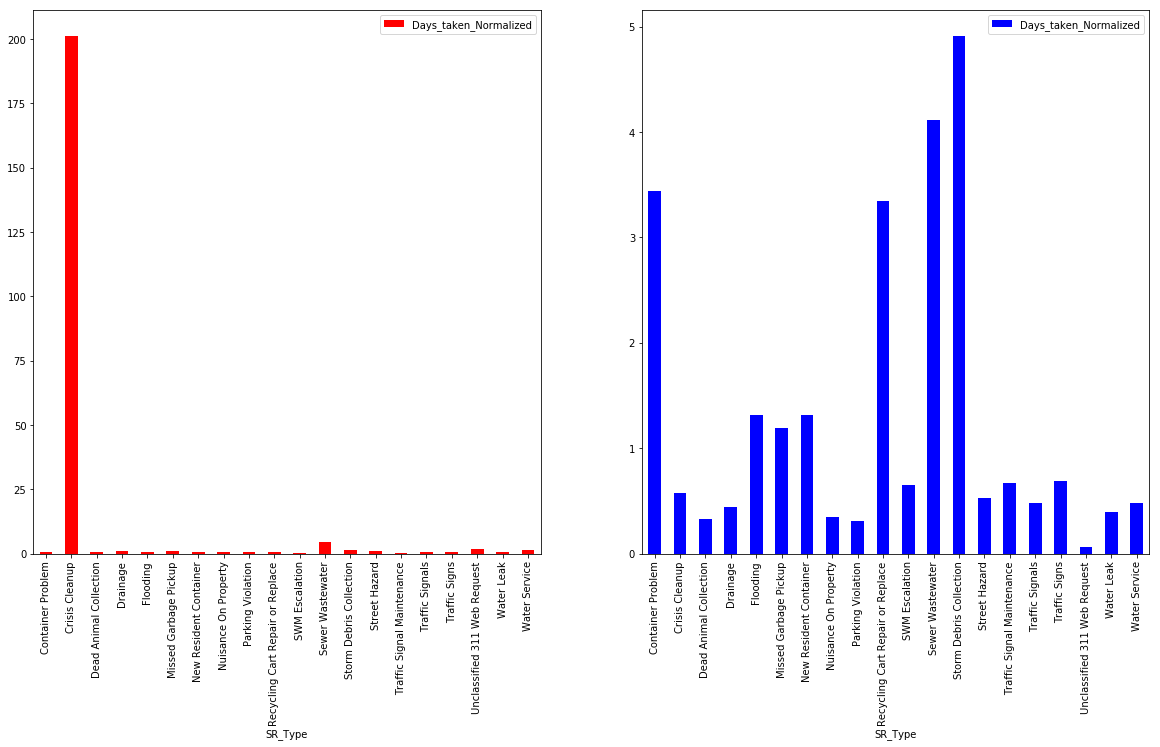

In [46]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
before_overdue_mean.plot(kind='bar',color='r',ax=ax1)
ax2 = fig.add_subplot(122)
after_overdue_mean.plot(kind='bar',color='b',ax=ax2)

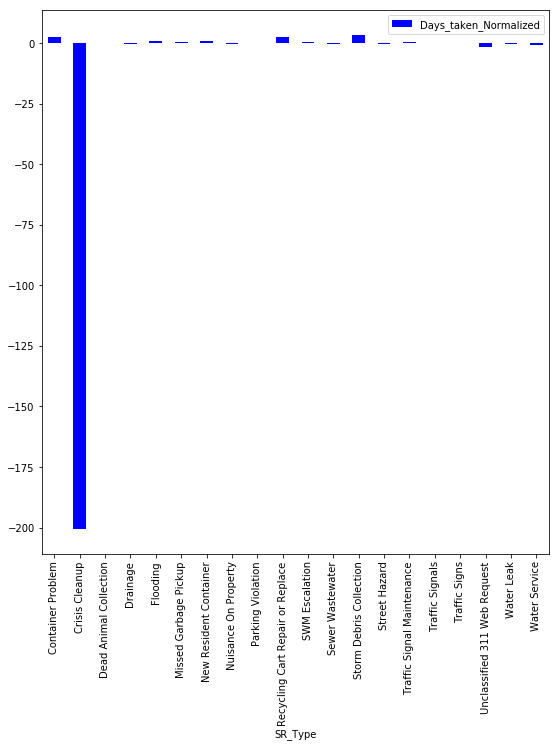

In [47]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_mean - before_overdue_mean).plot(kind='bar',color='b',ax=ax1)

## Without Crisis Cleanup Mean time of request completion

In [48]:
#Removing Crisis cleanup to get a better view 
top_20_wo_Crisis = ['Storm Debris Collection',
       'Missed Garbage Pickup',
       'Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak',
       'Flooding',
       'Sewer Wastewater',
       'Street Hazard',
       'Nuisance On Property',
       'Drainage',
       'Water Service',
       'Traffic Signs',
       'Unclassified 311 Web Request',
       'Recycling Cart Repair or Replace',
       'Parking Violation',
       'Traffic Signals',
       'Dead Animal Collection',
       'SWM Escalation',
       'New Resident Container']

In [49]:
# before harvey
before_overdue_mean_wo_Crisis = harvey_compiled_sub.loc[harvey_compiled_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

In [50]:
# after harvey
after_overdue_mean_wo_Crisis = harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

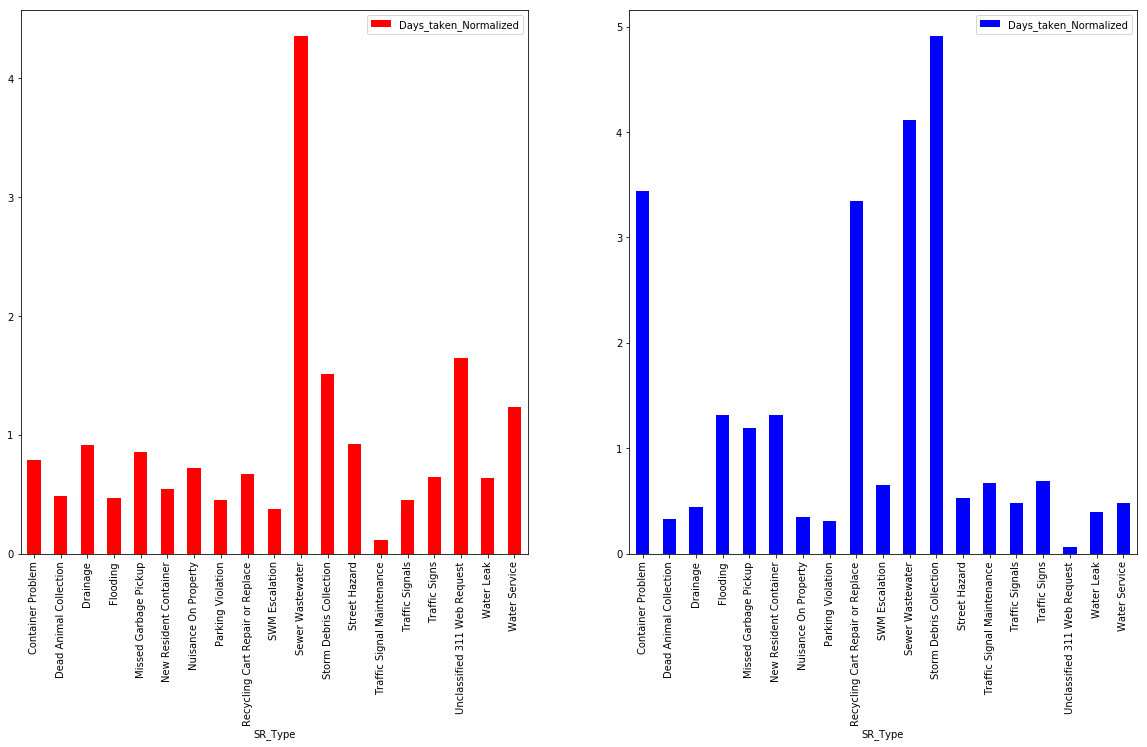

In [51]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
before_overdue_mean_wo_Crisis.plot(kind='bar',color='r',ax=ax1)
ax2 = fig.add_subplot(122)
after_overdue_mean_wo_Crisis.plot(kind='bar',color='b',ax=ax2)

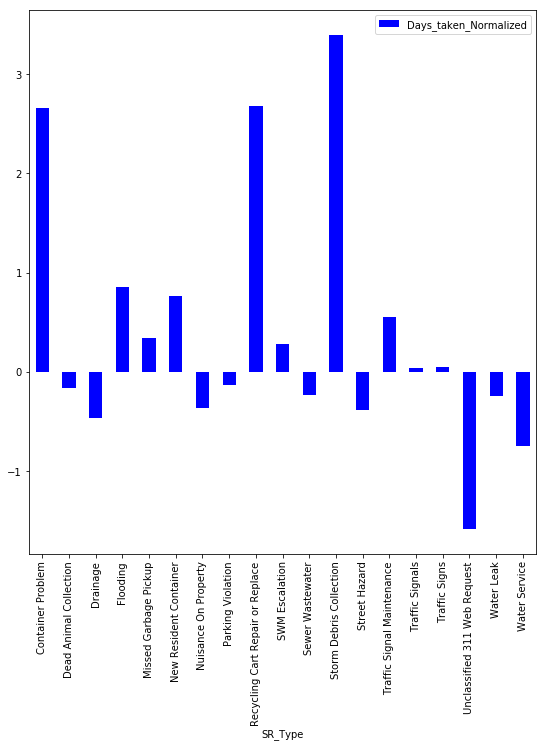

In [52]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_mean_wo_Crisis - before_overdue_mean_wo_Crisis).plot(kind='bar',color='b',ax=ax1)

## Without Crisis cleanup frequency of requests

In [53]:
# before harvey
before_overdue_freq_wo_Crisis = harvey_compiled_sub.loc[harvey_compiled_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').count()

In [54]:
# after harvey
after_overdue_freq_wo_Crisis = harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').count()

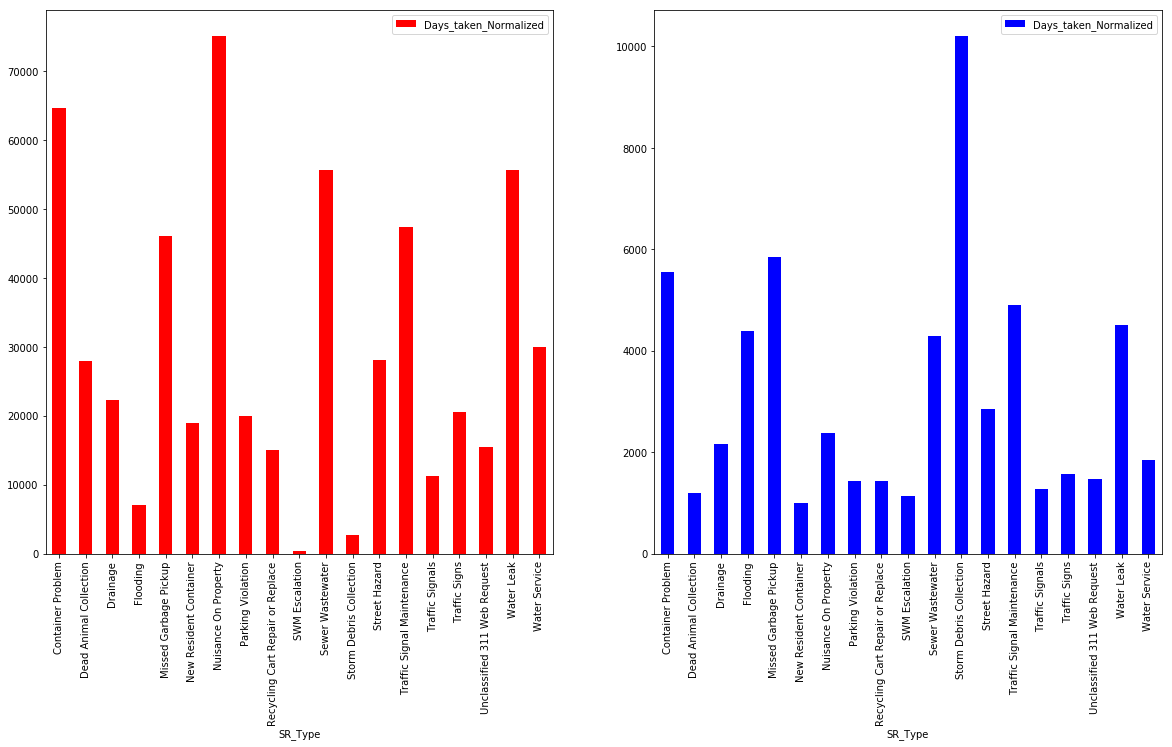

In [55]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
before_overdue_freq_wo_Crisis.plot(kind='bar',color='r',ax=ax1)
ax2 = fig.add_subplot(122)
after_overdue_freq_wo_Crisis.plot(kind='bar',color='b',ax=ax2)

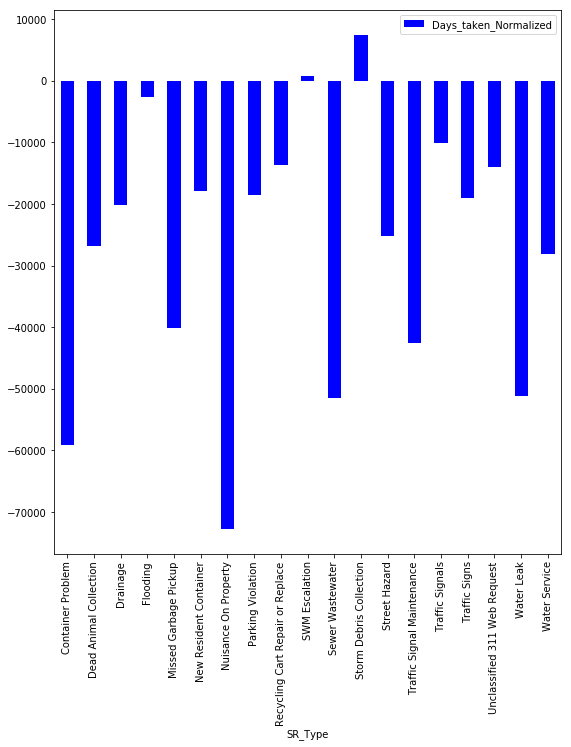

In [56]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_freq_wo_Crisis - before_overdue_freq_wo_Crisis).plot(kind='bar',color='b',ax=ax1)

In [57]:
type([np.arange(0,2)])

list